# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки для дальнейшего построения диаграмм
import seaborn as sns # вдруг барплоты и хитмэпы пригодятся?

data = pd.read_csv('/datasets/real_estate_data.csv') # читаем csv файл
display(data.head()) # изучаем основную информацию в данных

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


В данных обнаружен дефект в виде склейки в одну строку вместо разбития по колонкам. Вероятно это произошло из-за разделителей в формате '\t'. Далее пробуем считать с учетом этого повторно.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # повторно считывание с учетом выявленной особенности
display(data.head()) # изучаем основную информацию в данных в виде таблицы
data.info() # основная информация о датафрейме

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

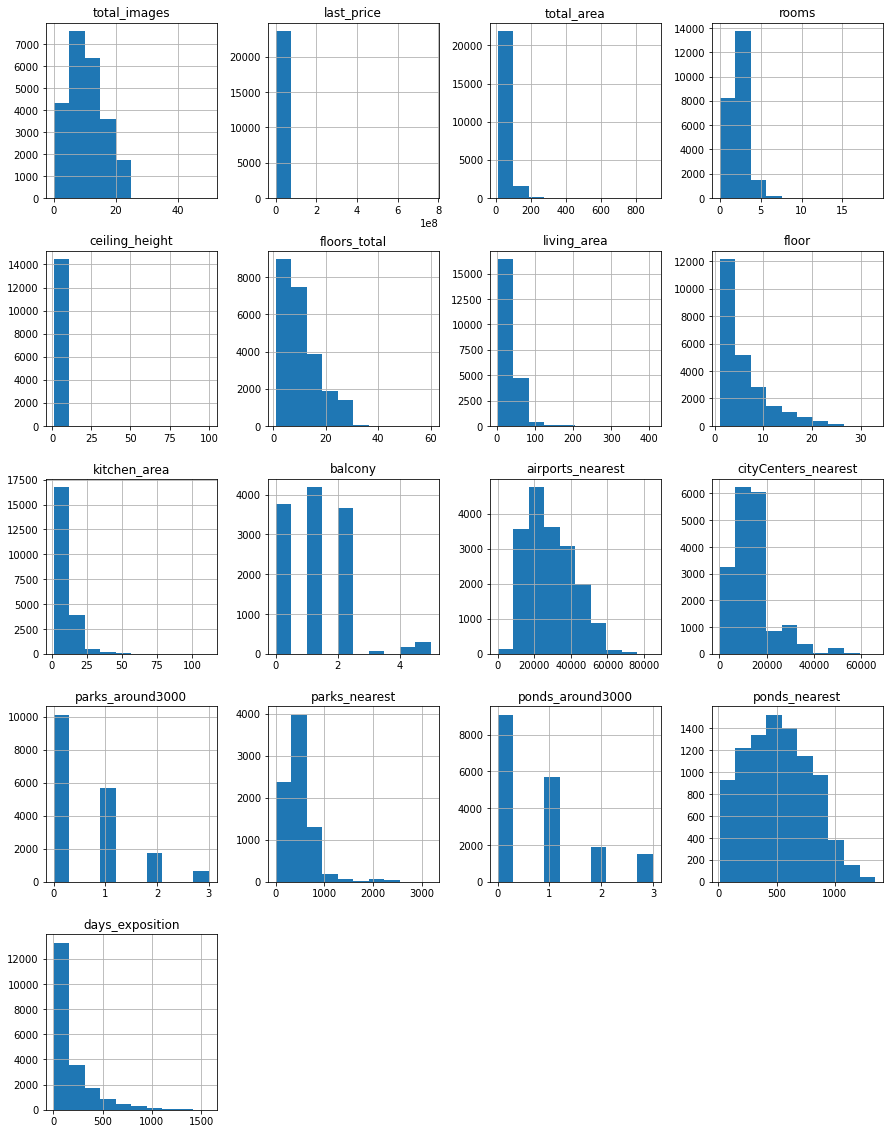

In [3]:
data.hist(figsize=(15, 20)) # информация о датафрейме в виде гистограмм по всем столбцам
plt.show()

Изучив информацию о датафрейме обнаружены многочисленные пропуски в данных по ряду столбцов. Первоначальная гистограмма last price оказалась не информативной ввиду масштабирования (более детальное отображение гистограмм будет в анализе данных ниже).

### Предобработка данных

*Обработка пропусков*

In [4]:
print(data.isna().sum()) # количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Пропуски обнаружены в столбцах: высота потолка, общее количество этажей в доме, жилой площади, апартаменты(да/нет), площади кухни, количество балконов, название населенного пункта, расстояние до ближайшего аэропорта в метрах, расстояние до центра города, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоёмов в радиусе 3 км,  расстояние до ближайшего водоёма, сколько дней было размещено объявление (от публикации до снятия)  

Возможные причины пропусков: 
высота потолка - необязательная графа при оформлении объявления, несущественная характеристика по мнению продавцов, из-за чего данные пропущены.
Общее количество этажей в доме, название населенного пункта - случайный технический сбой
жилая площадь, площади кухни - невнимательность продавцов при заполнении, отсутствии точных данных на момент объявления, преднамеренное скрытие данных
апартаменты(да/нет) - необязательная графа при оформлении объявления
количество балконов - ввиду их отсутствия продавец не указал при подаче объявления
сколько дней было размещено объявление - случайный технический сбой, в т.ч. если объявление было сразу удалено после подачи по ряду причин
расстояния до объектов - отсутствие данной информации у продавца, необязательная графа при оформлении объявления (аэропорты - возможно отсутствуют поблизости). Возможно также эти данные автоматически рассчитывались системой: если в радиусе поиска их не было - то из-за тех. сбоя они не отобразились.

In [5]:
data['balcony'] = data['balcony'].fillna(0)
data['locality_name'] = data['locality_name'].fillna('Unknown')
data['is_apartment'] = data['is_apartment'].fillna('Unknown')
    

coefficient_living_area = (data['living_area'] / data['total_area']).mean() # коэффициент для жилплощади
data.loc[(data['living_area'].isna()), 'living_area'] = data.loc[(data['living_area'].isna()), 'total_area'] * coefficient_living_area # пробуем заполнить c коэффициентом
coefficient_kitchen_area = (data['kitchen_area'] / data['total_area']).mean() # коэффициент для кухни
data.loc[(data['kitchen_area'].isna()), 'kitchen_area'] = data.loc[(data['kitchen_area'].isna()), 'total_area'] * coefficient_kitchen_area # пробуем заполнить c коэффициентом


data['floors_total'].fillna(data['floors_total'].median()) # замена пропущенных значений медианными (менее 0,5 процента от значений всего датафрейма)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # замена отсутствующих данных медианными значениями, так как все же это не ключевой показатель из задач дальнейшего исследования

df_for_nan = data.drop(list(data['cityCenters_nearest'].dropna().index)) # сделаем датафрейм с пропусками в 'cityCenters_nearest'
df_for_nan = df_for_nan[['cityCenters_nearest', 'locality_name']] # оставим столбцы с названием населенного пункта и пропусками в 'cityCenters_nearest'
display(df_for_nan['locality_name'].unique()) # взглянем на населенные пункты, где расстояние не указано

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

In [6]:
df_no_nan = data.query('cityCenters_nearest >= 0') # создадим датафрейм с информацией по cityCenters_nearest
display(df_no_nan['locality_name'].unique()) # взглянем на населенные пункты, где расстояние указано

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', 'Unknown',
       'посёлок Песочный', 'посёлок Петро-Славянка', 'посёлок Репино',
       'посёлок Сапёрный', 'посёлок Щеглово', 'поселок Лисий Нос',
       'посёлок Левашово', 'посёлок Белоостров', 'поселок Мурино',
       'посёлок Лисий Нос', 'посёлок Усть-Ижора'], dtype=object)

Изучив отдельные локации на карте Санкт-Петербурга и Ленинградской области из этих двух перечней, удалось прийти к заключению, что: вероятно речь идет о расстоянии до центра Санкт-Петербурга или до центра ближайших крупных городов (что вообще стоило бы указать в исходном описании данных); предположительно значения преимущественно пропущены в совсем отдаленных от Санкт-Петербурга пунктах. Учитывая их отдаленность и суммарное количество, лучше варианта чем заполнить их максимальными значениями среди указанных в выборке не нашел. Учитывая их разброс достаточно сложно найти более точный метод.

Парки, пруды, расстояния до аэропортов - не самые важные аспекты объявлений, заполнять их специальными методиками не целесообразно. Часть из них детально анализироваться далее не будут.

In [8]:
print(data.isna().sum()) # проверка обработанных пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Количество пропусков уменьшилось, часть по-прежнему присутствует, но уже в менее важных аспектах объявлений. Отмечено 86 пропусков в общей этажности зданий, вероятно не заполнившиеся медианными значениями. Попробуем их убрать (это менее 0,5% выборки), для возможности дальнейших расчетов. 

In [9]:
data = data.dropna(subset = ['floors_total']) # убрал недостающие значения
data.isna().sum() # еще раз проверил оставшиеся пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Оставляю в таком виде. Все таки основные данные удалось сохранить. Информация о парках явно вторична.

In [10]:
data.info() # еще раз проверяем столбцы, где нужно изменить тип данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

Столбцы для потенциальной замены формата данных: last_price, balcony, floors_total, cityCenters_nearest (int) - вряд ли кто-то будет указывать такие значения дробными числами. Ряд других столбцов будут округлены для упрощения восприятия.

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # переводим в дату и время
data.rename(columns = {'cityCenters_nearest':'citycenters_nearest'}, inplace=True) # переименовал этот столбец, так как содержал прописную букву

# столбцы для перевода в int (нужны только целые числа)
to_int = ['last_price', 'balcony', 'floors_total', 'citycenters_nearest']
for i in to_int:
    data[i] = data[data[i].notnull()][i].astype(int)

# столбцы для округления к 1му знаку после запятой
to_round_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for i in to_round_1:
    data[i] = data[data[i].notnull()][i].round(1)
    
# столбцы для округления без знаков после запятой
to_round_0 = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'citycenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']
for i in to_round_0:
    data[i] = data[data[i].notnull()][i].round(0)
    
data.head() # что получилось

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,Unknown,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,Unknown,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,Unknown,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,89.8,9,Unknown,...,29.8,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,Unknown,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Замена формата времени выполнена для корректного отображения, возможности дальнейшей работы с этими данными. Замена на целые числа выполнена для упрощения отображения формата данных (количество балконов, цена), дальнейшей возможности вычислений.

In [12]:
data.duplicated().sum() # подсчёт явных дубликатов

0

*Устранение неяных дубликатов*

In [13]:
print(data['locality_name'].unique()) #уникальные значения столбца с наименованиями населенных пунктов
data['locality_name'].value_counts() # количество уникальных значений столбца с наименованиями населенных пунктов

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Санкт-Петербург        15651
посёлок Мурино           520
посёлок Шушары           439
Всеволожск               398
Пушкин                   369
                       ...  
деревня Пикколово          1
поселок Сумино             1
деревня Хапо-Ое            1
деревня Чудской Бор        1
деревня Куровицы           1
Name: locality_name, Length: 365, dtype: int64

In [14]:
# переименовываем явные дубликаты приводя к единообразию (посёлок)

names = ["поселок городского типа", "посёлок городского типа", "поселок", "городской поселок", "городской посёлок", "садовое товарищество", "садоводческое некоммерческое товарищество", "посёлок при железнодорожной станции", "коттеджный посёлок"]

for name in names:
    data['locality_name'] = data['locality_name'].str.replace(name, "посёлок", case = False)    

In [15]:
print(data['locality_name'].unique()) # проверяем на наличие неявных дубликатов

['Санкт-Петербург' 'посёлок Шушары' 'посёлок Янино-1' 'посёлок Парголово'
 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'посёлок Красный Бор' 'Гатчина'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой' 'посёлок Лебяжье'
 'посёлок Сиверский' 'посёлок Молодцово' 'посёлок Кузьмоловский'
 'посёлок Новая Ропша' 'Павловск' 'деревня Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'деревня Куттузи'
 'посёлок Аннино' 'посёлок Ефимовский' 'посёлок Плодовое'
 'деревня Заклинье' 'посёлок Торковичи' 'посёлок Первомайское'
 'Красное Село' 'посёлок Понтонный' 'Сясьстрой' 'деревня Старая'
 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы' 'село Путилово'
 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино' 'Кудрово'
 'посёлок Романовка' 'посёлок Бугры' 'посёлок Рощино' 'Кириши' 'Луга'
 'Волосово' 'Отрадное' '

Неявные дубликаты устранены. Восприятие также становится несколько проще ввиду единообразия наименований.

*Устранение редких и выбивающихся значений*

In [16]:
data.describe() # оцениваем на наличие редких и выбивающихся значений

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,18081.000000,18104.000000,18105.000000,8045.000000,18105.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340668,2.071147,2.707869,10.673824,34.570419,5.877313,10.568818,0.593063,28788.008185,14185.084015,0.611433,490.554630,0.770119,518.209469,180.884839
std,5.681541,1.090172e+07,35.649000,1.078380,0.991930,6.597173,22.339781,4.873539,6.095938,0.960307,12626.209956,8614.132292,0.802168,341.336698,0.939075,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В некоторых столбцах отмечены аномально высокие и низкие значения. Прежде всего стоило бы уточнить у представителей данной выборки о действительности этих данных. Наименее реалистичными выглядят 100 м потолки, квартиры без комнат, жилплощадь 2 м. Попробуем убрать эти строки и посмотреть сильно ли изменилось количество данных.

In [17]:
data = data.query('ceiling_height < 100') # убираем совсем маловероятно высокие потолки

data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10 # изменяем высоту потолка где она больше 20 м       

data = data.query('rooms > 0') # убираем квартиры без комнат
data = data.query('living_area > 3') # убрал квартиры с жилплощадью менее 3 кв м - всякое может быть, но выглядит странно(квартира ли это?).  
    
data.describe() # что получили

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23415.000000,2.341500e+04,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,17960.000000,17983.000000,17984.000000,8015.000000,17984.000000,8990.000000,20257.000000
mean,9.891309,6.564276e+06,60.597002,2.088362,2.681730,10.622550,34.699189,5.854922,10.610656,0.589323,28815.469321,14191.440305,0.613545,490.236182,0.769573,518.210122,181.517648
std,5.682904,1.092727e+07,35.603785,1.066191,0.254549,6.570199,22.346829,4.853725,6.087857,0.959435,12624.105704,8632.798310,0.803157,341.453476,0.939270,277.828205,220.062162
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,5.400000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.200000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18590.000000,9229.000000,0.000000,288.000000,0.000000,293.250000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.500000,13086.000000,0.000000,454.000000,0.000000,503.000000,96.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.200000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


После определенной фильтрации редких значений в датафрейме оставлены квартиры с комнатами, с реалистичной высотой потолков (не более 14 м, с жилплощадью 5 метров и более). По остальным значениям прослеживается адекватность (не уверен на счет кухни 112 м, хотя все может быть..). Основной массив данных остался сохранен (более 23 тыс значений).

### Посчитайте и добавьте в таблицу новые столбцы

In [18]:
data.head() # снова взглянем на наш датафрейм

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,Unknown,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,Unknown,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,Unknown,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,89.8,9,Unknown,...,29.8,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,Unknown,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


*Добавление данных в таблицу в соответствии с задачами исследования*

In [19]:
data['price_per_metre'] = (data['last_price'] / data['total_area']).round(1) # добавляем столбец с ценой за кв метр

data['day_of_week'] = data['first_day_exposition'].dt.dayofweek # делаем новый столбец для дней недели
#переименовываем дни недели в числа от 0 до 6 (в соответствии с заданием №3 пункт 2)

data['day_of_week'] = data['day_of_week'].astype(str).astype(int) # переведем день недели другой тип данных (Int) для дальнейших операций с данными

data['month'] = data['first_day_exposition'].dt.month # определяем месяц публикации объявления в новом столбце month
data['year'] = data['first_day_exposition'].dt.year # определяем год публикации объявления в новом столбце year

# присваиваем категорию этажа с помощью функции
def what_floor(data):
    floors_total = data['floors_total']
    floor = data['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
# применяем функцию к вновь созданному нами столбцу
data['floor_category'] = data.apply(what_floor, axis = 1)

#создаем столбец для определения расстояния до центра города в километрах
data.loc[:,'distance_to_centre_kms'] = (data.loc[:, 'citycenters_nearest']  / 1000) # в километре 1000 м
#data['distance_to_centre_kms'] = data[data['distance_to_centre_kms'].notnull()].round(0) # округлим

Датафрейм перед исследовательским анализом данных:

In [20]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,day_of_week,month,year,floor_category,distance_to_centre_kms
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,Unknown,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.028
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,Unknown,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,18.603
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,Unknown,...,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,13.933
3,0,64900000,159.0,2015-07-24,3,2.6,14,89.8,9,Unknown,...,84.0,3.0,234.0,424.0,408176.1,4,7,2015,другой,6.800
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,Unknown,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.098
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,Unknown,...,NaN,NaN,NaN,55.0,95065.8,0,9,2018,другой,NaN
6,6,3700000,37.3,2017-11-02,1,2.6,26,10.6,6,Unknown,...,NaN,0.0,NaN,155.0,99195.7,3,11,2017,другой,19.143
7,5,7915000,71.6,2019-04-18,2,2.6,24,40.4,22,Unknown,...,NaN,0.0,NaN,NaN,110544.7,3,4,2019,другой,11.634
8,20,2900000,33.2,2018-05-23,1,2.6,27,15.4,26,Unknown,...,NaN,NaN,NaN,189.0,87349.4,2,5,2018,другой,NaN
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,Unknown,...,NaN,0.0,NaN,289.0,88524.6,6,2,2017,другой,15.008


### Проведите исследовательский анализ данных

*Общее изучение параметров*

count    23415.000000
mean        60.597002
std         35.603785
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

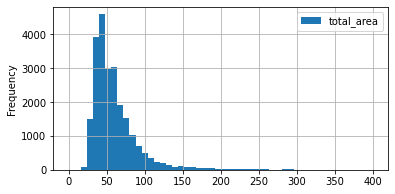

In [21]:
# изучим основные факторы с помощью гистограмм и описательных характеристики в соответствии с условиями задач
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (6,3), range = (0,400))
data['total_area'].describe()

Медиана площади продаваемых квартир в Санкт-Петербурге около 52 кв метров, что может соответствовать размерам 2-3х комнатных квартир (чаще). Похоже, что распределение нормальное, распределение Гаусса.

count    23415.000000
mean        34.699189
std         22.346829
min          5.400000
25%         19.000000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

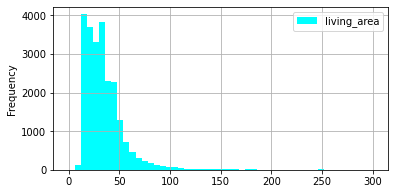

In [22]:
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (6,3), range = (0,300), color = 'aqua')
data['living_area'].describe()

Медиана жилой площади продаваемых квартир в Санкт-Петербурге 30 кв метров, что соответствует размерам 2-3х комнатных квартир (чаще). Распределение назвать затруднительно: видны пики, которые скорее всего могут быть связаны с наибольшей частотой продаж 2х и 3х комнатных квартир (например)

count    23415.000000
mean        10.610656
std          6.087857
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

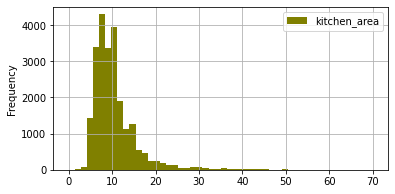

In [23]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (6,3), range = (0, 70), color = 'olive')
data['kitchen_area'].describe()

Медиана площади кухни продаваемых квартир в Санкт-Петербурге 9 кв метров, что соответствует типичным размерам кухни. Распределение больше похоже на нормальное (Гаусса)

count    2.341500e+04
mean     6.564276e+06
std      1.092727e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

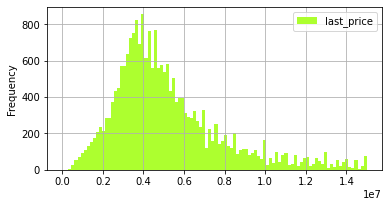

In [24]:
data.plot(y = 'last_price', kind='hist', bins = 100, grid=True, range = (0,15000000), figsize = (6,3), color = 'greenyellow')
data['last_price'].describe()

Медиана стоимости продаваемых квартир в Санкт-Петербурге 4,6 млн, что немного не похоже на средне-рыночные цены (при этом средняя цена 6,5 млн, что более похоже среднерыночную стоимость). Распределение похоже на нормальное (Гаусса)

count    23415.000000
mean         2.088362
std          1.066191
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

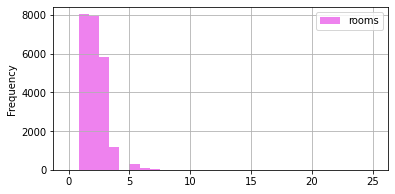

In [25]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (6,3), range = (0, 25), color = 'violet')
data['rooms'].describe()

Ранее выдвинутые предположения частично подтвердились: наиболее часто продаются 1 и 2х комнатные квартиры. Медиана 2. Распределение описать сложно, скорее ближе к Пуассона.

count    23415.000000
mean         2.681730
std          0.254549
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

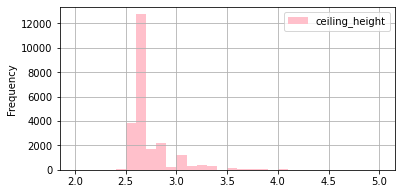

In [26]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (6,3), color = 'pink')
data['ceiling_height'].describe()

Медиана высоты потолка в продаваемых квартирах в Санкт-Петербурге составляет 2,6 м, что соответствует общепринятым стандартам в жилых помещениях (в новостройках может колебаться от 2,5 до 2,7). Распределение больше похоже на нормальное. 

count    23415.000000
mean         5.854922
std          4.853725
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

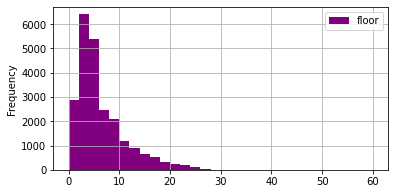

In [27]:
data.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,60), grid=True, figsize = (6,3), color = 'purple')
data['floor'].describe()

Медиана этажа продаваемых квартир в Санкт-Петербурге - 4, что скорее указывает на то, что продаются в основном относительно старые квартиры (в 10 или 5 этажных домах), а не квартиры в многоэтажных новостройках. Распределение похоже на нормальное (Гаусса)

In [28]:
# создадим небольшой отдельный датафрейм для анализа категорий этажей
df_floor_category = data['floor_category'].value_counts()
df_floor_category.columns = ['floor_category', 'count']
display(df_floor_category)

другой       17197
последний     3322
первый        2896
Name: floor_category, dtype: int64

Text(0.5, 1.0, 'Этажи в продаваемых квартирах')

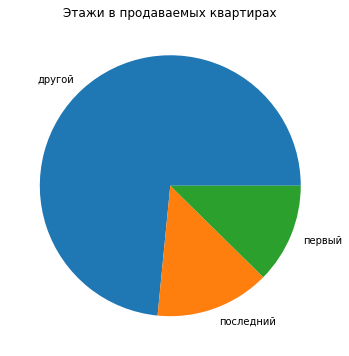

In [29]:
df_floor_category.plot(y='count', kind='pie', figsize = (6, 6)).set_ylabel('') # сделаем диаграмму типа - пирог
plt.title("Этажи в продаваемых квартирах")

Более 17 тыс квартир в Санкт-Петербурге продаются не на первом и не на последнем этажах. Количество продаваемых квартир на первом и последних этажах приблизительно одинаковое.

count    23415.000000
mean        10.622550
std          6.570199
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

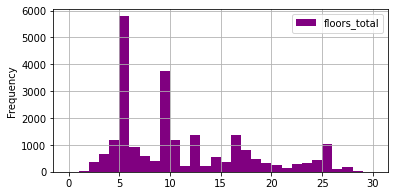

In [30]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (0,30), grid=True, figsize = (6,3), color = 'purple')
data['floors_total'].describe()

Медиана и среднее общее количество этажей домов в объявлениях указывают на то что, это 9-10 этажные здания, скорее всего не новостройки (многоэтажные). Данные также подтверждаются пиками в районе 5 этажных зданий, что также свидетельствует о вторичности продаваемых квартир. Распределение назвать сложно, скорее больше похоже на ненормальное.

count    17983.000000
mean     14191.440305
std       8632.798310
min        181.000000
25%       9229.000000
50%      13086.000000
75%      16285.000000
max      65968.000000
Name: citycenters_nearest, dtype: float64

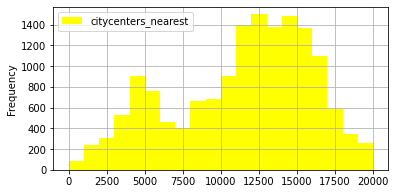

In [31]:
data.plot(y = 'citycenters_nearest', kind = 'hist', bins = 20, grid=True, figsize = (6,3), range = (0, 20000), color = 'yellow')
data['citycenters_nearest'].describe()

Медиана расстояния до центра города составила 13 тыс метров. Распределение больше похоже на нормальное. Резкий пик, вероятно, связан с дополнительным заполнением медианными значениями.

count    17960.000000
mean     28815.469321
std      12624.105704
min          0.000000
25%      18590.000000
50%      26757.500000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

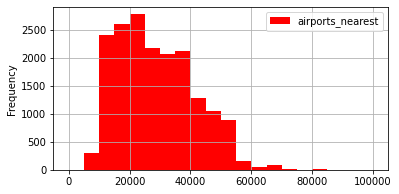

In [32]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 20, grid=True, figsize = (6,3), range = (0, 100000), color = 'red')
data['airports_nearest'].describe()

Медиана расстояния до ближайшего аэропорта составила 26 тыс метров. Распределение похоже на нормальное (Гаусса).

count    8015.000000
mean      490.236182
std       341.453476
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

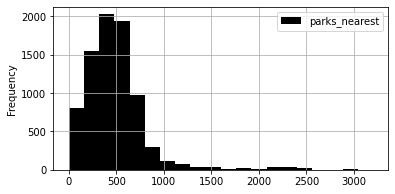

In [33]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 20, grid=True, figsize = (6,3), range = (0, 3200), color = 'black')
data['parks_nearest'].describe()

Основная масса парков расположена в пешей доступности (до 612 м), но есть и варианты с далеким расположением не в зеленой зоне. Распределение не является нормальным.

count    23415.000000
mean         2.566816
std          1.789552
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_week, dtype: float64


Text(0.5, 1.0, 'Частота публикации объявлений по дням недели')

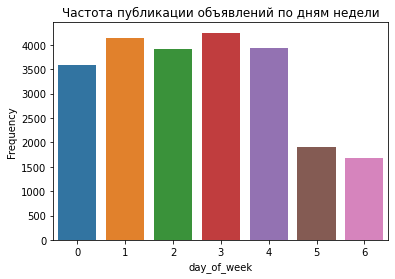

In [34]:
print(data['day_of_week'].describe()) 

pivot_table_date_category = data.pivot_table(index = 'day_of_week', values = 'month', aggfunc = 'count').reset_index() # сводная таблица была необязательна, но показалось проще посчитать таким методом
sns.barplot(x='day_of_week', y='month', data = pivot_table_date_category).set_ylabel('Frequency') # барплот по дням недели выглядит интереснее
plt.title("Частота публикации объявлений по дням недели")

Наиболее часто объявления публикуются по будням (вероятно публикация возможна только после проверки модераторами в будние дни), медиана приходится на четверг.

count    23415.000000
mean         6.394405
std          3.492348
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64


<AxesSubplot:ylabel='Frequency'>

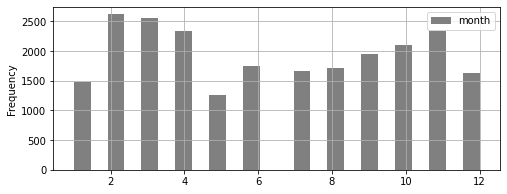

In [35]:
print(data['month'].describe())

data.plot(y = 'month', kind = 'hist', bins = 24, grid=True, figsize = (8,3), range = (1, 12), color = 'grey')
# барплот по месяцам

Наиболее часто объявления публикуются весной (февраль-апрель) и осенью (сентябрь-ноябрь). Медиана приходится на июнь. Можно описать сезонностью рынка недвижимости. Возможно люди стремятся продать квартиру к лету или к новому году (дополнительный источник дохода для отпуска?), с учетом длительности продаж таких объектов. Однозначный вывод сделать сложно. Возможно, так как сами продавцы не находятся в отпуске (летом/зимой).

*Изучение скорости продаж квартир*

count    20257.000000
mean       181.517648
std        220.062162
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


<AxesSubplot:ylabel='Frequency'>

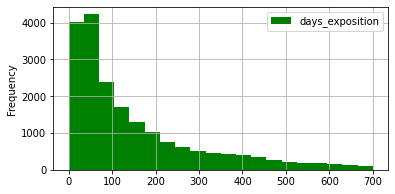

In [36]:
print(data['days_exposition'].describe())

data.plot(y = 'days_exposition', kind = 'hist', bins = 20, grid=True, figsize = (6,3), range = (0, 700), color = 'green')


Медиана времени продажи составила 96 дней (т.е. 3 месяца), а вот среднее гораздо больше - практически полгода. Далее вероятно либо квартира была продана, либо объявление снято с продажи. Судя по квартилям, обычно квартиры продаются от 45 до 232 дней. Распределение Пуассона.
Предполагаю, что продажи более 3 месяцев разумно считать долгими, а продажи более полугода-7 месяцев стоит считать необычно долгими (основной массив данных в этих объявлениях укладыватся в 7 месяцев).

*Изучение влияния факторов на стоимость объектов*

***Влияние общей площади квартир***

Коэффициент корреляции: 0.653041476611416


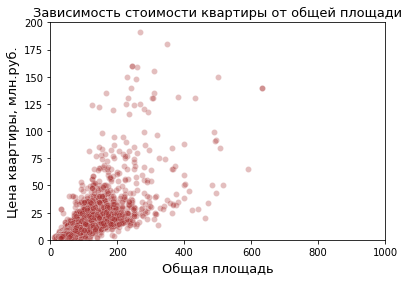

In [37]:
print('Коэффициент корреляции:', data['total_area'].corr(data['last_price']))
sns.scatterplot(x=data['total_area'], y=data['last_price'] / 1000000, alpha=.3, color = 'brown') # перевели цены в миллионы для наилучшего отображения

plt.title('Зависимость стоимости квартиры от общей площади', size=13)
plt.xlabel('Общая площадь', size=13)
plt.ylabel('Цена квартиры, млн.руб.', size=13)
plt.ylim(0, 200)
plt.xlim(0, 1000)
plt.show()

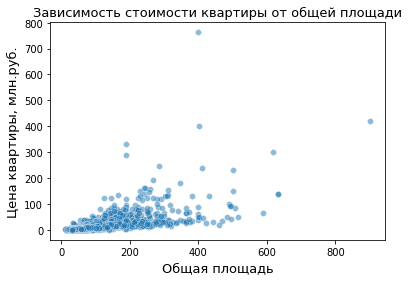

In [38]:
# код ревьюера
sns.scatterplot(x=data['total_area'], y=data['last_price'] / 1000000, alpha=.5) # перевели цены в миллионы для наилучшего отображения

plt.title('Зависимость стоимости квартиры от общей площади', size=13)
plt.xlabel('Общая площадь', size=13)
plt.ylabel('Цена квартиры, млн.руб.', size=13)

plt.show()

Прослеживается корреляция между площадью квартир в Санкт-Петербурге и их стоимостью (особенно отчетлива корреляция с площадью квартир до 150 кв м). Однако коэффициент корреляции не равен единице - очевидно, что цена будет зависеть и от других факторов. Пожалуй, наиболее очевидный фактор для продаж данных объектов. 

***Влияние жилой площади квартир***

Коэффициент корреляции: 0.5851475367716386


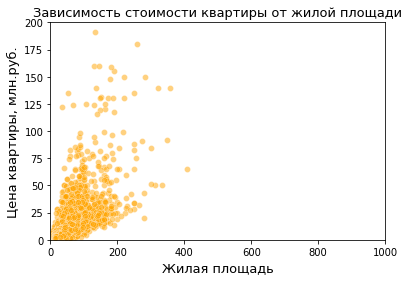

In [39]:
print('Коэффициент корреляции:', data['living_area'].corr(data['last_price']))

sns.scatterplot(x=data['living_area'], y=data['last_price'] / 1000000, alpha=.5, color = 'orange') # перевели цены в миллионы для наилучшего отображения

plt.title('Зависимость стоимости квартиры от жилой площади', size=13)
plt.xlabel('Жилая площадь', size=13)
plt.ylabel('Цена квартиры, млн.руб.', size=13)
plt.ylim(0, 200)
plt.xlim(0, 1000)
plt.show()

Прослеживается корреляция между жилой площадью квартир в Санкт-Петербурге и их стоимостью (особенно отчетлива корреляция с жилой площадью квартир до 75 кв м). Однако коэффициент корреляции не равен единице - очевидно, что цена будет зависеть и от других факторов. 

***Влияние площади кухни***

Коэффициент корреляции: 0.5152703815382632


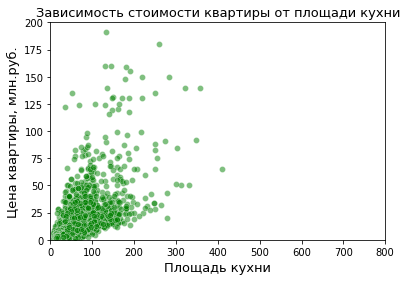

In [40]:
print('Коэффициент корреляции:', data['kitchen_area'].corr(data['last_price']))

sns.scatterplot(x=data['living_area'], y=data['last_price'] / 1000000, alpha=.5, color = 'green') # перевели цены в миллионы для наилучшего отображения

plt.title('Зависимость стоимости квартиры от площади кухни', size=13)
plt.xlabel('Площадь кухни', size=13)
plt.ylabel('Цена квартиры, млн.руб.', size=13)
plt.ylim(0, 200)
plt.xlim(0, 800)
plt.show()

Прослеживается корреляция между площадью кухни в квартирах в Санкт-Петербурге и их стоимостью (особенно отчетлива корреляция с жилой площадью 20 кв м). Однако коэффициент корреляции не равен единице и существенно меньше предыдущих показателей, что указывает на меньшую выраженность влияния этого фактора на ценообразование на рынке недвижимости Санкт-Петербурга.

***Влияние количества комнат***

Коэффициент корреляции: 0.36459869547859775


,median,count
rooms,,
1,3600000,8013
2,4762338,7912
3,6200000,5794
4,9000000,1177
5,14000000,325
6,19000000,104
7,24900000,59
8,23095000,12
9,23750000,8


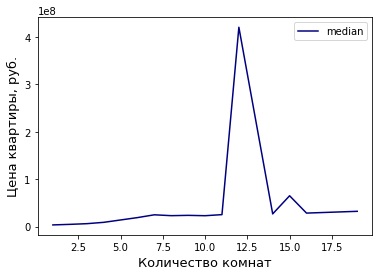

In [41]:
pivot_table_rooms_number = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc=['median', 'count']) # создадим сводную таблицу
pivot_table_rooms_number.columns = ['median', 'count'] # переименуем столбцы
print('Коэффициент корреляции:', data['rooms'].corr(data['last_price']))
pivot_table_rooms_number.plot(y='median', figsize=(6, 4), color = 'navy') 
plt.xlabel('Количество комнат', size=13)
plt.ylabel('Цена квартиры, руб.', size=13)
display(pivot_table_rooms_number)

Корреляция между количеством комнат и стоимостью объектов прослеживается (особенно до 7 комнат). В целом фактор оказывает меньшее влияния на ценоообразование, чем предыдущие (впечатление, что все же из-за большого разброса количества комнат).

***Влияние типа этажа***

Коэффициент корреляции: 0.02831920541235641


,median,count
floor,,
1,3900000,2896
2,4500000,3343
3,4650000,3057
4,4700000,2781
5,4400000,2605
6,5100000,1283
7,4975000,1198
8,4850000,1067
9,4700000,1035


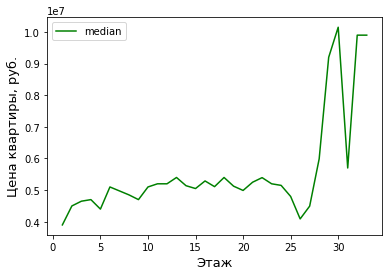

In [42]:
pivot_table_floor_number = data.pivot_table(index = 'floor', values = 'last_price', aggfunc=['median', 'count']) # создадим сводную таблицу
pivot_table_floor_number.columns = ['median', 'count'] # переименуем столбцы
print('Коэффициент корреляции:', data['floor'].corr(data['last_price']))
pivot_table_floor_number.plot(y='median', figsize=(6, 4), color = 'green')
plt.xlabel('Этаж', size=13)
plt.ylabel('Цена квартиры, руб.', size=13)
display(pivot_table_floor_number)

Корреляция между номером этажа и стоимостью объектов отсутствует (коэффициент практически равен 0). Стоит отметить, что большинство квартир находятся не на последнем и не на первом этаже (которые обычно дешевле, впрочем в зависимости от новизны постройки)

*Зависимость стоимости квартиры от типа этажа*

,median,count
floor_category,,
другой,4870000,17197
первый,3900000,2896
последний,4300000,3322


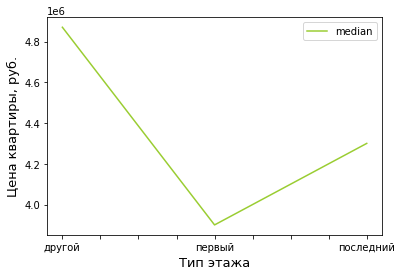

In [43]:
pivot_table_floor_type = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc=['median', 'count']) # создадим сводную таблицу
pivot_table_floor_type.columns = ['median', 'count'] # переименуем столбцы

pivot_table_floor_type.plot(y='median', figsize=(6, 4), color = 'yellowgreen')
plt.xlabel('Тип этажа', size=13)
plt.ylabel('Цена квартиры, руб.', size=13)
display(pivot_table_floor_type)

Выявлено что наиболее высокие медианные значения стоимости квартир, расположенных не на первых и не на последних этажах. Однако, стоит отметить, что в выборке преимущественно именно такой тип квартир.

***Влияние даты (день недели, месяц, год)***

Коэффициент корреляции: 0.0016637178294086116


,median,count
day_of_week,,
0,4650000,3582
1,4750000,4133
2,4700000,3925
3,4650000,4247
4,4600000,3940
5,4600000,1910
6,4550000,1678


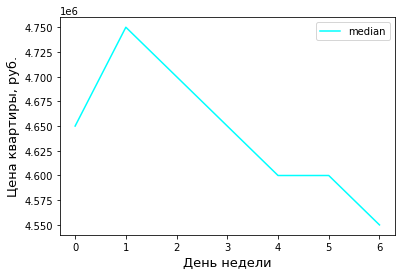

In [44]:
pivot_table_day_number = data.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc=['median', 'count']) # создадим сводную таблицу
pivot_table_day_number.columns = ['median', 'count'] # переименуем столбцы
print('Коэффициент корреляции:', data['day_of_week'].corr(data['last_price']))
pivot_table_day_number.plot(y='median', figsize=(6, 4), color = 'aqua') 
plt.xlabel('День недели', size=13)
plt.ylabel('Цена квартиры, руб.', size=13)
display(pivot_table_day_number)

Взаимосвязи между днем недели и стоимостью квартир не обнаружено. Однако, отмечена интересная тенденция: медиана стоимости выше для объявлений выложенных во вторник и меньше для выходных дней. Возможно пользователи на выходных самостоятельно оценивают собственные квартиры, выкладывают их в начале недели с завышенной суммой (публикуются после модерации во вторник). А те, кто обсуждают цены с риэлторами в течение недели - выкладывают с более объективными ценами (предположение).

Коэффициент корреляции: 0.0029123761280152143


,median,count
month,,
1,4600000,1484
2,4650000,2618
3,4690000,2563
4,4800000,2348
5,4530000,1257
6,4400000,1748
7,4675000,1671
8,4600000,1720
9,4700284,1951


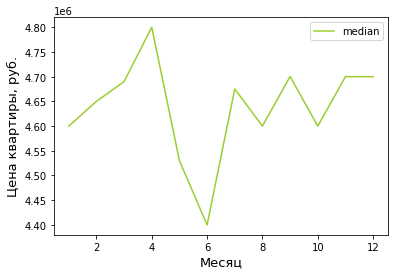

In [45]:
pivot_table_month_number = data.pivot_table(index = 'month', values = 'last_price', aggfunc=['median', 'count']) # создадим сводную таблицу
pivot_table_month_number.columns = ['median', 'count'] # переименуем столбцы
print('Коэффициент корреляции:', data['month'].corr(data['last_price']))
pivot_table_month_number.plot(y='median', figsize=(6, 4), color = 'yellowgreen')
plt.xlabel('Месяц', size=13)
plt.ylabel('Цена квартиры, руб.', size=13)
display(pivot_table_month_number)

Взаимосвязи между стоимостью объектов и месяцем объявления не выявлено. Видно, что наибольшая стоимость отмечена в апреле и ноябре/декабре. Сложно связать с чем-то определенным: возможно люди принимают решение о продаже с целью дальнейшего переезда на лето/зиму (предположение) с наибольшей выгодой для себя. Впрочем разброс медианных значений не так уж велик: около 200-300 тыс руб. По меркам ценообразования квартир это не столь существенно.

Коэффициент корреляции: -0.042553850432323


,median,count
year,,
2014,7700000,137
2015,5337000,1180
2016,4550000,2759
2017,4500000,8066
2018,4600000,8419
2019,5100000,2854


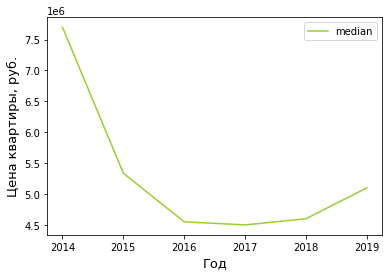

In [46]:
pivot_table_year_number = data.pivot_table(index = 'year', values = 'last_price', aggfunc=['median', 'count']) # создадим сводную таблицу
pivot_table_year_number.columns = ['median', 'count'] # переименуем столбцы
print('Коэффициент корреляции:', data['year'].corr(data['last_price']))
pivot_table_year_number.plot(y='median', figsize=(6, 4), color = 'yellowgreen') 
plt.xlabel('Год', size=13)
plt.ylabel('Цена квартиры, руб.', size=13)
display(pivot_table_year_number)

Взаимосвязи между стоимостью объектов и годом объявления не выявлено (коэффициент корреляции практически равен 0). Отмечается, что медиана стоимости все же была выше для объявлений за 2014 год и далее с 2017 начала увеличиваться. С 2014 года был спад стоимости, возможно связанный с определенной кризисной ситуацией (спрос меньше), что вероятно накладывает отпечаток на ценообразование, хотя тенденция до конца не ясна. После стабилизации ситуации, спрос стал увеличиваться с 2017 г (как предположение).

*Общая информация о взаимосвязях факторов со стоимостью объектов*

,last_price
last_price,1.000000
price_per_metre,0.739227
total_area,0.653041
living_area,0.585148
kitchen_area,0.515270
rooms,0.364599
ceiling_height,0.257282
ponds_around3000,0.160616
parks_around3000,0.151070
total_images,0.104580


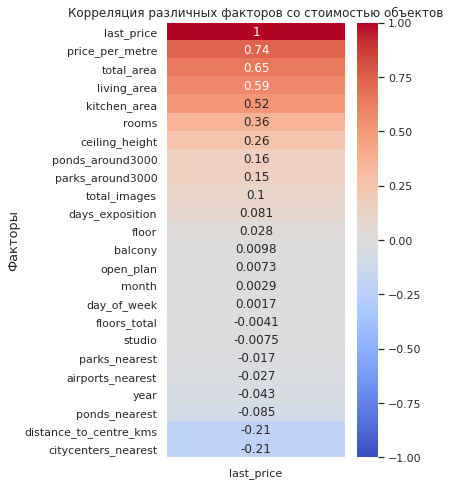

In [56]:
plt.figure(figsize=(4,8))

# наиболее наглядный способ визуализации на мой взгяд для корреляций

sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap= 'coolwarm', annot=True, vmin=-1, vmax=1, center=0)
plt.title("Корреляция различных факторов со стоимостью объектов")
plt.ylabel('Факторы', size=13)


display(data.corr()[['last_price']].sort_values(by='last_price', ascending=False))

На хитмэпе отражены все факторы, потенциально оказывающие влияние на ценообразование. Обращает на себя внимание отдельный фактор - цена за квадратный метр, имеющий наиболее высокую корреляцию (что очевидно: он напрямую исходно зависит от стоимости). Остальные факторы были проанализрованы ранее.

*Средняя цена квадратного метра в 10 населенных пунктах*

In [48]:
pivot_table_locality = data.pivot_table(index = 'locality_name', values = 'price_per_metre', aggfunc=['count']) # создадим сводную таблицу
pivot_table_locality.columns = ['count'] # переименуем столбец с количеством объявлений
display(pivot_table_locality.sort_values('count', ascending=False).head(10)) # взглянем на 10 населенных пунктов, с которым будем далее работать

,count
locality_name,
Санкт-Петербург,15538
посёлок Мурино,526
посёлок Шушары,435
Всеволожск,392
Пушкин,369
Колпино,338
посёлок Парголово,323
Гатчина,307
деревня Кудрово,283


In [49]:
df_locations = pd.DataFrame() # создал отдельный датафрейм для анализа
df_locations['count'] = data.groupby('locality_name')['price_per_metre'].count() # сделал столбец с подсчетом количества объявлений по населенным пунктам
df_locations['mean_price_per_metre'] = data.groupby('locality_name')['price_per_metre'].mean() # сделал столбец с подсчетом средней цены за квадратный метр по населенным пунктам 
#оставим в датафрейме только 10 населенных пунктов с наибольшим количеством объявлений (то есть больше 237 как видно в предыдущем датафрейме)
df_locations = df_locations.query('count >= 237').sort_values(by='count', ascending=False) 
display(df_locations) # взглянем на полученный датафрейм

,count,mean_price_per_metre
locality_name,,
Санкт-Петербург,15538,114753.964654
посёлок Мурино,526,85029.035551
посёлок Шушары,435,78278.569425
Всеволожск,392,68618.914031
Пушкин,369,103125.818970
Колпино,338,75424.338166
посёлок Парголово,323,90291.121672
Гатчина,307,68746.095114
деревня Кудрово,283,92295.822968


In [50]:
# код ревьюера
(data.groupby('locality_name', as_index=False).agg({'last_price' : 'count', 'price_per_metre' : 'mean'}) # группируем данные, рассчитывая количество объявлений и среднюю стоимость квадратного метра
                                              .rename({'last_price' : 'count', 'price_per_metre' : 'mean_price_per_metre'}, axis=1) # переименовываем столбцы
                                              .sort_values(by='count', ascending=False) # сортируем по количеству объявлений в порядке убывания
                                              .head(10) # берем только первые 10 строк, то есть топ-10
                                              .sort_values(by='mean_price_per_metre', ascending=False) # сортируем топ-10 в порядке убывания по средней цене квадратного метра
)

,locality_name,count,mean_price_per_metre
34,Санкт-Петербург,15538,114753.964654
33,Пушкин,369,103125.818970
80,деревня Кудрово,283,92295.822968
232,посёлок Парголово,323,90291.121672
220,посёлок Мурино,526,85029.035551
299,посёлок Шушары,435,78278.569425
14,Колпино,338,75424.338166
7,Гатчина,307,68746.095114
4,Всеволожск,392,68618.914031
5,Выборг,237,58141.765401


,count,mean_price_per_metre
locality_name,,
Санкт-Петербург,15538,114753.964654
Пушкин,369,103125.818970
деревня Кудрово,283,92295.822968
посёлок Парголово,323,90291.121672
посёлок Мурино,526,85029.035551
посёлок Шушары,435,78278.569425
Колпино,338,75424.338166
Гатчина,307,68746.095114
Всеволожск,392,68618.914031


Text(0.5, 1.0, 'Средняя стоимость квадратного метра объекта в населенных пунктах')

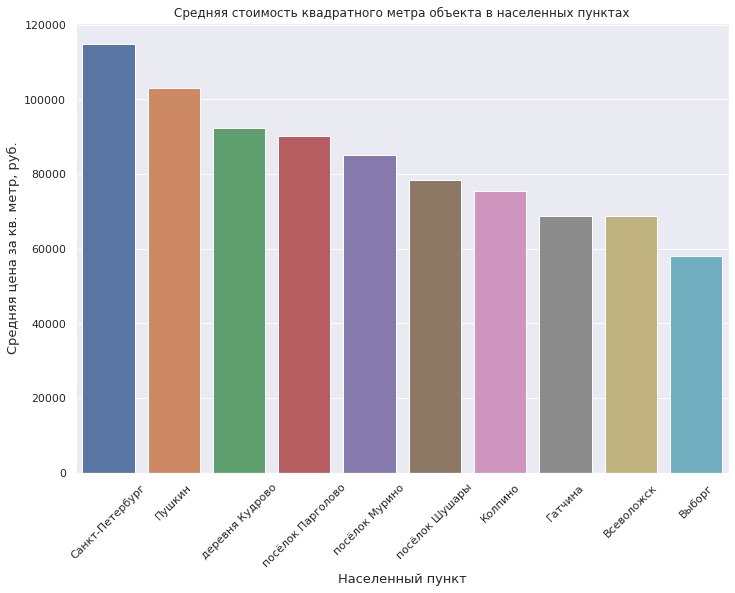

In [51]:
# отсортируем датафрейм в зависимости от средней цены за квадратный метр
df_locations = df_locations.sort_values(by='mean_price_per_metre', ascending=False)
display(df_locations)
# сделаем барплот для наглядности
sns.set(rc={'figure.figsize':(11.7,8.27)}) # увеличим размер
plt.xticks(rotation=45) # развернем подписи
df_locations = df_locations.reset_index() # предварительно уберем индексы
sns.barplot(x='locality_name', y='mean_price_per_metre', data = df_locations).set_ylabel('mean_price_per_metre')
plt.xlabel('Населенный пункт', size=13)
plt.ylabel('Средняя цена за кв. метр, руб.', size=13)
plt.title("Средняя стоимость квадратного метра объекта в населенных пунктах")

Среди населенных пунктов с наибольшим количеством объявлений было обнаружено, что наибольшая средняя стоимость квадратного метра объектов в Санкт-Петербурге (что очевидно), наименьшая в Выборге, что, вероятно, все же определяется его удаленностью от крупного мегаполиса.

*Зависимость стоимости объектов от расстояния до центра города*

In [52]:
df_distance = pd.DataFrame(data=data, columns=['distance_to_centre_kms', 'last_price', 'locality_name']) # создадим датафрейм
df_distance = df_distance.dropna() # пришлось удались строки без 'distance_to_centre_kms', которые оставались из-за незаполненных пропусков citycenters для возможности дальнейшего анализа

# при дальнейшей проверке видно, что разница с удаленными строками - всего 60 строк (для данного датафрейма с фильтром по Санкт-Петербургу).
# Вряд ли имеет существенное значение в текущем анализе (менее 0,5%)

df_distance['distance_to_centre_kms'] = df_distance['distance_to_centre_kms'].astype(int) # переведем в числовой формат
df_distance = df_distance.query('locality_name == "Санкт-Петербург"') # оставим в датафрейме только Санкт-Петербург
display(df_distance)
df_distance.describe()

,distance_to_centre_kms,last_price,locality_name
0,16,13000000,Санкт-Петербург
2,13,5196000,Санкт-Петербург
3,6,64900000,Санкт-Петербург
4,8,10000000,Санкт-Петербург
7,11,7915000,Санкт-Петербург
...,...,...,...
23689,16,3550000,Санкт-Петербург
23690,6,5500000,Санкт-Петербург
23691,4,9470000,Санкт-Петербург
23694,4,9700000,Санкт-Петербург


,distance_to_centre_kms,last_price
count,15478.000000,1.547800e+04
mean,11.082892,8.058191e+06
std,4.833913,1.301591e+07
min,0.000000,1.219000e+04
25%,8.000000,4.200000e+06
50%,12.000000,5.520000e+06
75%,14.000000,8.179000e+06
max,29.000000,7.630000e+08


Применим группировку с помощью сводной таблицы и построим график зависимости средних значений цены от расстояния до центра города.

Коэффициент корреляции: -0.2591125940814364


,mean,count
distance_to_centre_kms,,
0,2.344232e+07,86
1,1.889542e+07,239
2,1.625193e+07,305
3,1.349427e+07,522
4,1.360665e+07,901
5,1.528102e+07,763
6,1.433792e+07,465
7,1.286818e+07,404
8,8.452810e+06,661


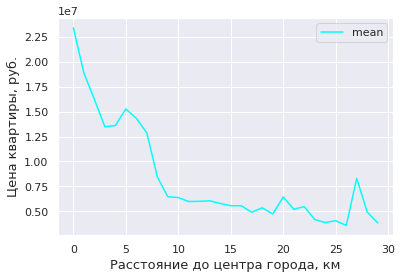

In [53]:
df_distance_new  = df_distance.pivot_table(index = 'distance_to_centre_kms', values = 'last_price', aggfunc = ['mean', 'count']) # создадим сводную таблицу
df_distance_new.columns = ['mean', 'count'] # переименуем столбцы
print('Коэффициент корреляции:', df_distance['distance_to_centre_kms'].corr(df_distance['last_price']))
df_distance_new.plot(y='mean', figsize=(6, 4), color = 'aqua').set_ylabel('mean_last_price') 
plt.xlabel('Расстояние до центра города, км', size=13)
plt.ylabel('Цена квартиры, руб.', size=13)
display(df_distance_new)

Оказывается, что стоимость объектов все же не так сильно зависит от расстояния до центра города. Некоторая взаимосвязь прослеживается, но коэффициент корреляции достаточно низкий. Вероятно, это может быть связано с тем, что все же город несколько меньше Москвы - нет причин потребности слишком близкого расположения к центру. С другой стороны в выборке основной массив данных от 6 до 14 км, что и так достаточно близко к центру.

<AxesSubplot:>

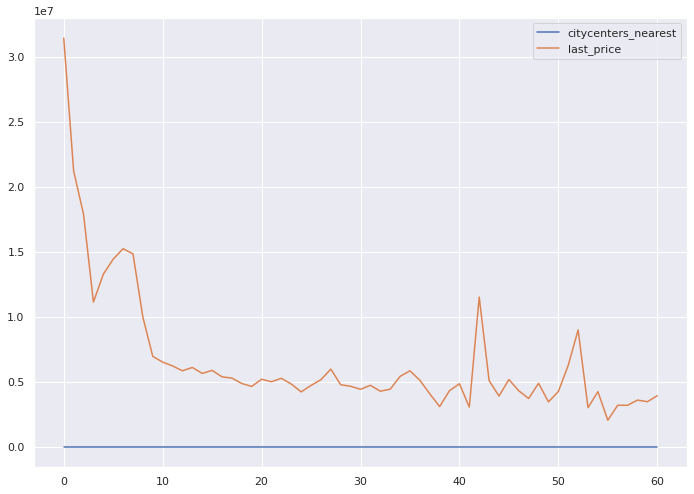

In [54]:
# код ревьюера
data['citycenters_nearest'] = round(data['citycenters_nearest'] / 1000).astype('Int64')
data.groupby('citycenters_nearest', as_index=False).agg({'last_price' : 'mean'}).plot()

### Общий вывод

Проведенный анализ объявлений о продаже квартир в Санкт-Петербурге и ближайших населенных пунктах, выявил, что наибольшее влияние на стоимость квартиры оказывает общая площадь квартиры и, несколько меньше, жилая площадь квартир. Некоторой взаимосвязью обладают площадь кухни и стоимость квартир, однако, в меньшей степени. Ожидаемая корреляция между количеством комнат и стоимостью также была подтверждена. Не выявлено взаимосвязи между типом этажей здания и стоимостью квартир в указанной выборке. Существенной взаимосвязи стоимости квартир с днем, месяцем, годом публикации объявления не выявлено, однако определены ряд тенденций, связанных со временем публикаций: стоимость объявлений оказалась выше в будние дни, в некоторых месяцах (апрель, ноябрь, декабрь), а также снижение стоимости в периоде с 2014 по 2017 год (что, вероятно, могло быть обусловлено низким спросом из-за кризисного периода). Установлено, что наибольшая средняя стоимость квадратного метра объектов в Санкт-Петербурге (что очевидно), наименьшая в Выборге (вероятно, обусловлено удаленностью последнего от мегаполиса). Не выявлено существенной взаимосвязью между расстоянием до центра города и стоимостью, что, возможно, обусловлено исходным массивом данных (6-14 км), что указывает на исходно близкое расположение к центру.